In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor ,  StackingRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pickle

In [2]:
df = pd.read_csv(r'C:\Users\Hp\OneDrive\Documents\Scraping_task_debi_1\predicting_mobile_game_success_train_set.csv')
df.head()


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568,Games,"Games, Strategy, Puzzle",11/7/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960,Games,"Games, Strategy, Board",11/7/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816,Games,"Games, Board, Strategy",11/7/2008,5/9/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
df.tail()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
13594,https://apps.apple.com/us/app/112-number-puzzl...,1341719804,112 \u2013 Number Puzzle Swiper,"Swipe, match & connect",https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,112! Is a fun and addictive number puzzle game...,Xuan Thang Nguyen,4+,EN,25232384,Games,"Games, Strategy, Entertainment, Puzzle",7/2/2018,20/03/2018
13595,https://apps.apple.com/us/app/xup/id1341771790,1341771790,Xup,Puzzle Game,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Do you like addicting puzzle games? In this mi...,Gamegos,4+,EN,89807872,Games,"Games, Puzzle, Strategy",2/2/2018,30/03/2018
13596,https://apps.apple.com/us/app/vandals/id134183...,1341831522,Vandals,Sneak & Paint Puzzle Game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3.5,44.0,3.99,NaN,"""Vandals is an infiltration game that will tra...",ARTE Experience,4+,EN,312530944,Games,"Games, Puzzle, Strategy",12/4/2018,6/9/2018
13597,https://apps.apple.com/us/app/card-crushers-ba...,1341837401,Card Crushers: Battle game TCG,Multiplayer strategy CCG / RPG,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.5,51.0,0.00,"1.99, 0.99, 4.99, 4.99, 2.99, 9.99, 0.99, 0.99...","Build your deck, collect epic cards and Crush ...",Jiri Bukovjan,12+,"AR, CS, EN, FR, DE, HI, IT, PL, PT, RU, SK, ES...",122459136,Games,"Games, Card, Strategy",13/05/2018,31/05/2019
13598,https://apps.apple.com/us/app/counter-terroris...,1341864732,Counter Terrorist Strike Force,Police officer rescue hostage,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Select your favorite weapon and play the most ...,Ahmed Faseeh,17+,EN,92805120,Games,"Games, Action, Strategy, Entertainment",2/3/2018,2/3/2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           13599 non-null  object 
 1   ID                            13599 non-null  int64  
 2   Name                          13599 non-null  object 
 3   Subtitle                      2828 non-null   object 
 4   Icon URL                      13599 non-null  object 
 5   Average User Rating           6518 non-null   float64
 6   User Rating Count             6518 non-null   float64
 7   Price                         13598 non-null  float64
 8   In-app Purchases              6351 non-null   object 
 9   Description                   13599 non-null  object 
 10  Developer                     13599 non-null  object 
 11  Age Rating                    13599 non-null  object 
 12  Languages                     13558 non-null  object 
 13  S

In [5]:
print(df.isnull().sum())

URL                                 0
ID                                  0
Name                                0
Subtitle                        10771
Icon URL                            0
Average User Rating              7081
User Rating Count                7081
Price                               1
In-app Purchases                 7248
Description                         0
Developer                           0
Age Rating                          0
Languages                          41
Size                                0
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64


In [6]:
df.drop(['URL' , 'Icon URL', 'Name', 'Subtitle','Description','Developer','ID'], axis=1, inplace=True)

In [7]:
df = df.dropna(subset=["Average User Rating"])

In [8]:
df['Languages'].fillna('Unknown', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_44300\1659238371.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Languages'].fillna('Unknown', inplace=True)


In [9]:
df['In-app Purchases'].fillna("None", inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_44300\3399798057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['In-app Purchases'].fillna("None", inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6518 entries, 0 to 13597
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Average User Rating           6518 non-null   float64
 1   User Rating Count             6518 non-null   float64
 2   Price                         6518 non-null   float64
 3   In-app Purchases              6518 non-null   object 
 4   Age Rating                    6518 non-null   object 
 5   Languages                     6518 non-null   object 
 6   Size                          6518 non-null   int64  
 7   Primary Genre                 6518 non-null   object 
 8   Genres                        6518 non-null   object 
 9   Original Release Date         6518 non-null   object 
 10  Current Version Release Date  6518 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 611.1+ KB


In [11]:
df["User Rating Count"] = np.log1p(df["User Rating Count"])  
df["Size"] = np.log1p(df["Size"])
df["Price"] = np.log1p(df["Price"])
#log1p preserves 0, reduces the impact of extreme values, and helps the model learn better

In [12]:
df["Is_Free"] = (df["Price"] == 0).astype(int)
df["Price_Category"] = pd.cut(df["Price"], 
                            bins=[-0.1, 0, 1, 2, 10], 
                            labels=['Free', 'Cheap', 'Medium', 'Expensive'])

In [13]:
df["Rating_Count_Category"] = pd.cut(df["User Rating Count"], 
                                    bins=[-0.1, 2, 5, 8, 20], 
                                    labels=['Low', 'Medium', 'High', 'Very_High'])

In [14]:
df["Size_MB"] = np.expm1(df["Size"]) / (1024 * 1024)  # Back to MB for categorization
df["Size_Category"] = pd.cut(df["Size_MB"], 
                            bins=[0, 50, 200, 500, 10000], 
                            labels=['Small', 'Medium', 'Large', 'Very_Large'])
df.drop("Size_MB", axis=1, inplace=True)

In [15]:
df["Has_IAP"] = (df["In-app Purchases"] != "None").astype(int)

In [16]:
def extract_iap_stats(iap_str):
    if iap_str == "None":
        return 0, 0, 0
    
    prices = []
    for item in iap_str.split(","):
        try:
            price = float(item.strip().replace("$", ""))
            prices.append(price)
        except:
            continue
    
    if len(prices) == 0:
        return 0, 0, 0
    
    return len(prices), min(prices), max(prices)


In [17]:
df[["IAP_Count", "IAP_Min_Price", "IAP_Max_Price"]] = df["In-app Purchases"].apply(
    lambda x: pd.Series(extract_iap_stats(x))
)

df["IAP_Price_Range"] = df["IAP_Max_Price"] - df["IAP_Min_Price"]
df.drop(columns=["In-app Purchases"], inplace=True)

In [18]:
df["Num_Languages"] = df["Languages"].apply(lambda x: len(x.split(",")))
df["Is_Multilingual"] = (df["Num_Languages"] > 5).astype(int)
df["Has_English"] = df["Languages"].str.contains("EN").astype(int)
df.drop(columns=["Languages"], inplace=True)

In [19]:
df["Num_Genres"] = df["Genres"].apply(lambda x: len(x.split(",")))
top_genres = ["Strategy", "Puzzle", "Action", "Card", "Board", "Adventure", 
            "Simulation", "Casino", "Trivia", "Word"]
for g in top_genres:
    df[f"Has_{g}"] = df["Genres"].str.contains(g, case=False, na=False).astype(int)

df.drop(columns=["Genres"], inplace=True)


In [20]:
df = pd.get_dummies(df, columns=["Age Rating"], drop_first=False, prefix="Age")
df = pd.get_dummies(df, columns=["Primary Genre"], drop_first=False, prefix="Genre")
df = pd.get_dummies(df, columns=["Price_Category"], drop_first=False, prefix="PriceCat")
df = pd.get_dummies(df, columns=["Rating_Count_Category"], drop_first=False, prefix="RatingCat")
df = pd.get_dummies(df, columns=["Size_Category"], drop_first=False, prefix="SizeCat")

In [21]:
df["Original_Release_Date"] = pd.to_datetime(df["Original Release Date"], format="mixed", dayfirst=True, errors='coerce')
df["Current_Version_Date"] = pd.to_datetime(df["Current Version Release Date"], format="mixed", dayfirst=True, errors='coerce')

df["App_Age_Days"] = (df["Current_Version_Date"] - df["Original_Release_Date"]).dt.days

df["Release_Year"] = df["Original_Release_Date"].dt.year
df["Release_Month"] = df["Original_Release_Date"].dt.month
df["Version_Year"] = df["Current_Version_Date"].dt.year

reference_date = pd.Timestamp("2024-01-01")
df["Days_Since_Update"] = (reference_date - df["Current_Version_Date"]).dt.days

df["Update_Frequency"] = df["App_Age_Days"] / (df["Days_Since_Update"] + 1)

df.drop(columns=["Original Release Date", "Current Version Release Date", "Original_Release_Date", "Current_Version_Date"], inplace=True)

In [22]:
df["App_Age_Days"].fillna(df["App_Age_Days"].median(), inplace=True)
df["Days_Since_Update"].fillna(df["Days_Since_Update"].median(), inplace=True)
df["Update_Frequency"].fillna(0, inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_44300\1226226288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["App_Age_Days"].fillna(df["App_Age_Days"].median(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_44300\1226226288.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [23]:
df["Rating_Count_X_Size"] = df["User Rating Count"] * df["Size"]
df["Price_X_IAP_Count"] = df["Price"] * df["IAP_Count"]
df["Age_X_Languages"] = df["App_Age_Days"] * df["Num_Languages"]

print("Final feature count:", df.shape[1] - 1)
print("Feature names:", df.columns.tolist())

Final feature count: 68
Feature names: ['Average User Rating', 'User Rating Count', 'Price', 'Size', 'Is_Free', 'Has_IAP', 'IAP_Count', 'IAP_Min_Price', 'IAP_Max_Price', 'IAP_Price_Range', 'Num_Languages', 'Is_Multilingual', 'Has_English', 'Num_Genres', 'Has_Strategy', 'Has_Puzzle', 'Has_Action', 'Has_Card', 'Has_Board', 'Has_Adventure', 'Has_Simulation', 'Has_Casino', 'Has_Trivia', 'Has_Word', 'Age_12+', 'Age_17+', 'Age_4+', 'Age_9+', 'Genre_Book', 'Genre_Business', 'Genre_Education', 'Genre_Entertainment', 'Genre_Finance', 'Genre_Food & Drink', 'Genre_Games', 'Genre_Health & Fitness', 'Genre_Lifestyle', 'Genre_Medical', 'Genre_Music', 'Genre_News', 'Genre_Productivity', 'Genre_Reference', 'Genre_Shopping', 'Genre_Social Networking', 'Genre_Sports', 'Genre_Stickers', 'Genre_Travel', 'Genre_Utilities', 'PriceCat_Free', 'PriceCat_Cheap', 'PriceCat_Medium', 'PriceCat_Expensive', 'RatingCat_Low', 'RatingCat_Medium', 'RatingCat_High', 'RatingCat_Very_High', 'SizeCat_Small', 'SizeCat_Medium

In [24]:
X = df.drop(columns=["Average User Rating"])
y = df["Average User Rating"]

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)

Train shape: (5214, 68)
Val shape: (1304, 68)


In [26]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

In [27]:
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    
    print(f"{model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    
    return model, rmse, r2, mae, y_pred

results = {}

In [28]:
ridge = Ridge(alpha=10.0)
ridge_model, ridge_rmse, ridge_r2, ridge_mae, ridge_pred = evaluate_model(
    ridge, X_train_scaled, X_val_scaled, y_train, y_val, "Ridge Regression"
)
results['Ridge'] = {'rmse': ridge_rmse, 'r2': ridge_r2, 'mae': ridge_mae}

lasso = Lasso(alpha=0.001, max_iter=10000)
lasso_model, lasso_rmse, lasso_r2, lasso_mae, lasso_pred = evaluate_model(
    lasso, X_train_scaled, X_val_scaled, y_train, y_val, "Lasso Regression"
)
results['Lasso'] = {'rmse': lasso_rmse, 'r2': lasso_r2, 'mae': lasso_mae}

elastic = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000)
elastic_model, elastic_rmse, elastic_r2, elastic_mae, elastic_pred = evaluate_model(
    elastic, X_train_scaled, X_val_scaled, y_train, y_val, "ElasticNet"
)
results['ElasticNet'] = {'rmse': elastic_rmse, 'r2': elastic_r2, 'mae': elastic_mae}

Ridge Regression
RMSE: 0.6847
R² Score: 0.1593
MAE: 0.5184
Lasso Regression
RMSE: 0.6846
R² Score: 0.1596
MAE: 0.5196


ElasticNet
RMSE: 0.6844
R² Score: 0.1602
MAE: 0.5186


In [29]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model, rf_rmse, rf_r2, rf_mae, rf_pred = evaluate_model(
    rf, X_train, X_val, y_train, y_val, "Random Forest"
)
results['Random Forest'] = {'rmse': rf_rmse, 'r2': rf_r2, 'mae': rf_mae}

Random Forest
RMSE: 0.6458
R² Score: 0.2521
MAE: 0.4760


In [30]:
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42
)
gbr_model, gbr_rmse, gbr_r2, gbr_mae, gbr_pred = evaluate_model(
    gbr, X_train, X_val, y_train, y_val, "Gradient Boosting"
)
results['Gradient Boosting'] = {'rmse': gbr_rmse, 'r2': gbr_r2, 'mae': gbr_mae}

Gradient Boosting
RMSE: 0.6595
R² Score: 0.2200
MAE: 0.4790


In [31]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)
xgb_model, xgb_rmse, xgb_r2, xgb_mae, xgb_pred = evaluate_model(
    xgb, X_train, X_val, y_train, y_val, "XGBoost"
)
results['XGBoost'] = {'rmse': xgb_rmse, 'r2': xgb_r2, 'mae': xgb_mae}

XGBoost
RMSE: 0.6628
R² Score: 0.2123
MAE: 0.4775


In [32]:
lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgbm_model, lgbm_rmse, lgbm_r2, lgbm_mae, lgbm_pred = evaluate_model(
    lgbm, X_train, X_val, y_train, y_val, "LightGBM"
)
results['LightGBM'] = {'rmse': lgbm_rmse, 'r2': lgbm_r2, 'mae': lgbm_mae}

LightGBM
RMSE: 0.6656
R² Score: 0.2055
MAE: 0.4857


In [33]:
cat = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=0
)
cat_model, cat_rmse, cat_r2, cat_mae, cat_pred = evaluate_model(
    cat, X_train, X_val, y_train, y_val, "CatBoost"
)
results['CatBoost'] = {'rmse': cat_rmse, 'r2': cat_r2, 'mae': cat_mae}

CatBoost
RMSE: 0.6512
R² Score: 0.2396
MAE: 0.4795


In [36]:
estimators = [
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('rf', rf)
]

stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=1.0),
    cv=5,
    n_jobs=-1
)

stacking_model, stack_rmse, stack_r2, stack_mae, stack_pred = evaluate_model(
    stacking, X_train, X_val, y_train, y_val, "Stacking Ensemble"
)
results['Stacking'] = {'rmse': stack_rmse, 'r2': stack_r2, 'mae': stack_mae}


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\resource_tracker.py:146: UserWarning: resource_tracker: process died unexpectedly, relaunching. Some folders/semaphores might leak.
  warnings.warn(


Stacking Ensemble
RMSE: 0.6445
R² Score: 0.2553
MAE: 0.4705


In [37]:
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('rmse')
print(results_df)

best_model_name = results_df.index[0]
print(f"Best Model: {best_model_name}")
print(f"RMSE: {results_df.loc[best_model_name, 'rmse']:.4f}")
print(f"R²: {results_df.loc[best_model_name, 'r2']:.4f}")
print(f"MAE: {results_df.loc[best_model_name, 'mae']:.4f}")


                       rmse        r2       mae
Stacking           0.644456  0.255267  0.470515
Random Forest      0.645812  0.252128  0.475982
CatBoost           0.651185  0.239632  0.479486
Gradient Boosting  0.659523  0.220035  0.479043
XGBoost            0.662776  0.212323  0.477459
LightGBM           0.665624  0.205538  0.485669
ElasticNet         0.684364  0.160174  0.518573
Lasso              0.684581  0.159642  0.519558
Ridge              0.684737  0.159260  0.518435
Best Model: Stacking
RMSE: 0.6445
R²: 0.2553
MAE: 0.4705


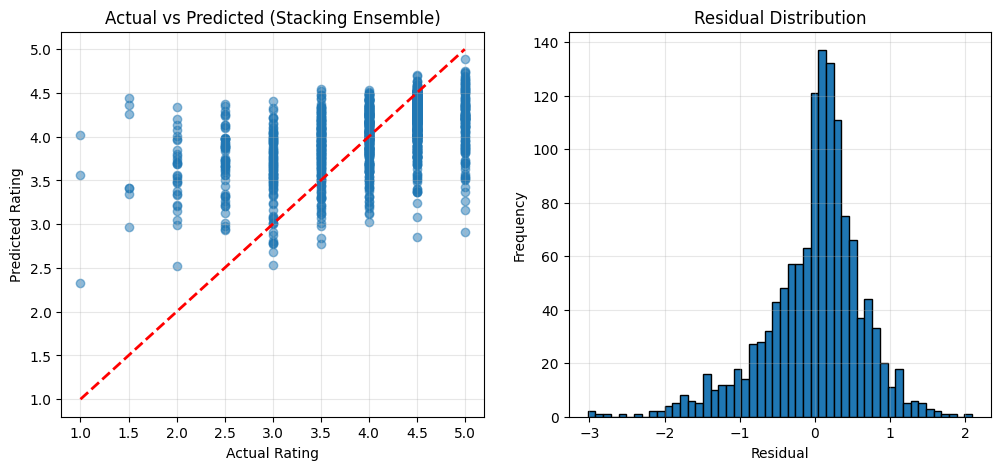

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_val, stack_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted (Stacking Ensemble)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_val - stack_pred
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(True, alpha=0.3)

In [42]:
base_path = r'C:\Users\Hp\OneDrive\Documents\Scraping_task_debi_1'


In [44]:
with open(f'{base_path}\\best_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)

with open(f'{base_path}\\scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open(f'{base_path}\\feature_names.pkl', 'wb') as f:
    pickle.dump(list(X_train.columns), f)



OSError: [Errno 28] No space left on device